## Linear regression analysis of TV sales

This is an example of using linear regression on advertisement data.  The data report sales of TV sets and they related to advertising budgets on TV, radio, and newspaper.  [This is an old data set that has been used for tutorials]

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

Next, the usual things we do when we get data ...

In [2]:
df = pd.read_csv("./advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


Do a scatterplot of `Sales` is related to `TV`. How well do you think linear regression will do?

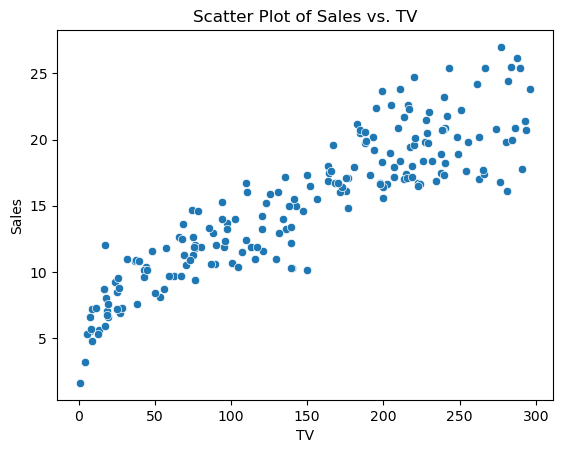

In [13]:
### It should do well I think because there intutitevely should be a positive correlation between the two 
sns.scatterplot(x='TV', y='Sales', data=df)
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('Scatter Plot of Sales vs. TV')
plt.show()

**Note**: I converted `df` columns into `np.array`, but it ends up being a row, so I have to use `reshape(-1,1)` to make it into a column.  Now I can run `LinearRegression`

In [14]:
x = np.array(df['TV']).reshape(-1,1)
y = np.array(df['Sales']).reshape(-1,1)
model1 = LinearRegression().fit(x, y)

Evaluate the model by using `model1.score(x,y)`. What is the interpretation of the score?

In [15]:
## score represents how well the data fits to a linear trend
print(model1.score(x,y))
# since the score is .812, we can interpret that to mean that our data fits a linear trend fairly well 

0.8121757029987414


Define b to be the intercept and a to be the slope, extract these from `model1`

In [16]:
##
b = model1.intercept_
a = model1.coef_[0]
print (a,b)

[0.05546477] [6.97482149]


Visualize how well we did by overlaying the regression line over the data. I used `model1.predict(x_pred)`, write the equation of the line using a and b above.

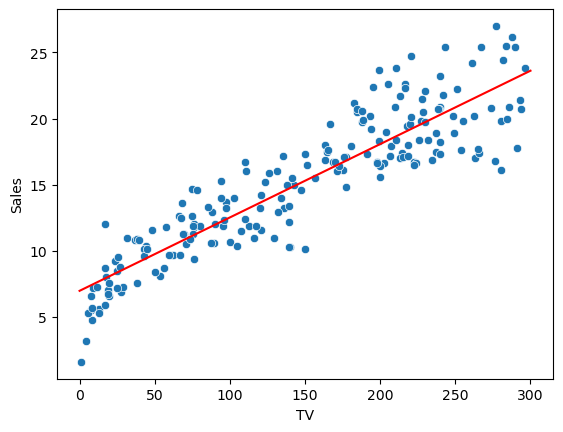

In [18]:
x_pred = np.linspace(0, 300, num=20).reshape((-1,1))
y_pred = model1.predict(x_pred)
# your sns.scatterplot here
sns.scatterplot(x='TV', y='Sales', data=df)
plt.plot(x_pred, y_pred, color="red")
plt.show()

Now we are going to split the data into training and testing sets using `train_test_split`

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

I wanted to see how the split is made so I plotted. Use `plt.scatter(x_train, y_train, color="red"` to plot the training data points.  Choose a different color for the test points.

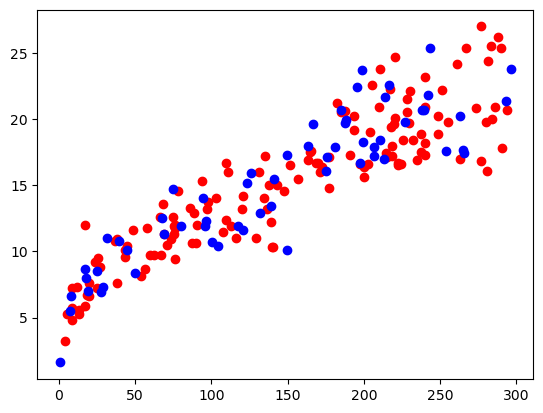

In [21]:
plt.scatter(x_train, y_train, color="red")
# text point scatter plot here
plt.scatter(x_test, y_test, color="blue")
plt.show()

Linear regression on the training set.

In [24]:
model2 = LinearRegression().fit(x_train, y_train)

Scoring the model to assess training error and testing error

In [26]:
#
print(model2.score(x_train,y_train))

0.8136850202064037


In [31]:
#
print(model2.score(x_test,y_test))

0.8075787226684583


## Your turn
Perform the same analysis to `Sales` vs `Newspaper`

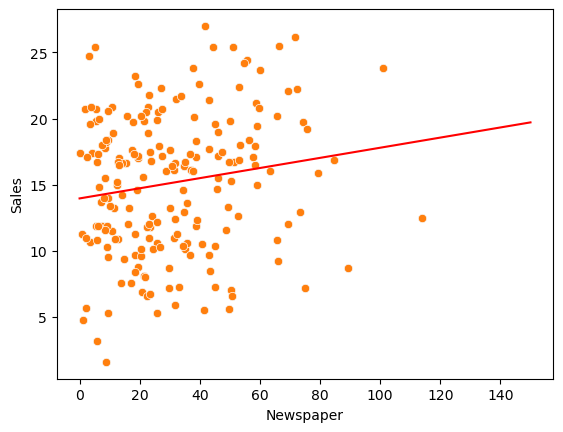

0.024951369862864836


In [30]:
sns.scatterplot(data = df, x = "Newspaper", y = "Sales")
x = np.array(df['Newspaper']).reshape(-1,1)
y = np.array(df['Sales']).reshape(-1,1)
model = LinearRegression().fit(x, y)
x_pred = np.linspace(0, 150, num=20).reshape((-1,1))
y_pred = model.predict(x_pred)
# your sns.scatterplot here
sns.scatterplot(x='Newspaper', y='Sales', data=df)
plt.plot(x_pred, y_pred, color="red")
plt.show()
print(model.score(x,y))
# bad score which makes sense as there is no apparent relationship between newspaper and sales